In [1]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 2.1 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import cv2 
import mxnet as mx 
from mxnet.gluon.data.vision import transforms 

In [3]:
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
FILE_PATH = "/content/drive/MyDrive/dataset/image/cat.jpg"

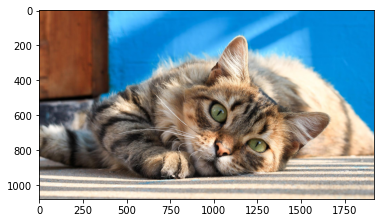

In [7]:
example_image = mx.image.imread(FILE_PATH)
plt.imshow(example_image.asnumpy())

In [20]:
def show_image(imgs, nrows, ncols, scale=2):
    aspect_ratio = imgs[0].shape[0]/imgs[1].shape[1] 
    figsize = (ncols * scale, nrows*scale * aspect_ratio)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i in range(nrows):
        for j in range(ncols):
            axes[i][j].imshow(imgs[i * ncols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes 

def apply(img, aug, nrows=2, ncols=4, scale=3):
    Y = [aug(img) for _ in range(nrows * ncols)]
    show_image(Y, nrows, ncols, scale)

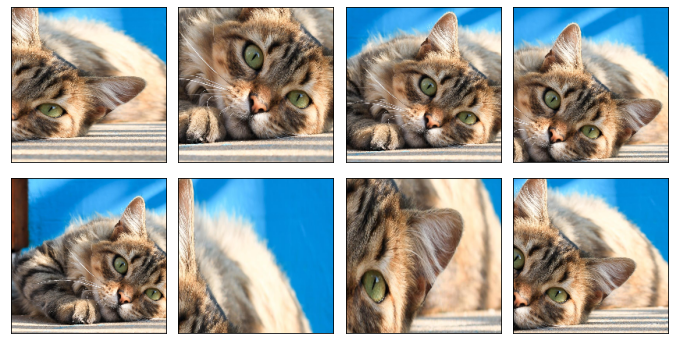

In [21]:
shape_aug = transforms.RandomResizedCrop(size=(200, 200),
                                         scale=(0.1, 1),
                                         ratio=(0.5, 2))
apply(example_image, shape_aug)